<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/012_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Scikit-Learn

**Scikit-Learn** (sklearn) es una de las bibliotecas más populares para aprendizaje automático en Python, ofreciendo herramientas y algoritmos para tareas como clasificación, regresión, agrupamiento y reducción de dimensionalidad. Construida sobre NumPy, SciPy, y matplotlib, se integra fácilmente con pandas y otros paquetes de análisis de datos.

### Características

- Fácil de usar, eficiente y con excelente documentación.
- Herramientas integradas para selección de características, evaluación de modelos y validación cruzada.
- Ideal para todo tipo de usuarios, desde principiantes hasta expertos.

## API de Scikit-Learn

La API de Scikit-Learn se rige por principios clave:

- **Consistencia**: Interfaz común (`fit`, `predict`, `transform`) para todos los objetos.
- **Inspección**: Exposición del estado interno de los objetos para facilitar su comprensión.
- **Simplicidad**: Jerarquía de objetos limitada para una curva de aprendizaje más corta.
- **Composición**: Facilidad para crear tuberías y modelos complejos con bloques simples.
- **Valores predeterminados**: Configuraciones por defecto adecuadas para obtener resultados sin ajustar muchos parámetros.

Para más detalles, consulta el [Scikit-Learn API paper](https://arxiv.org/abs/1309.0238).

## Cómo Usar Scikit-Learn

<img src="https://miro.medium.com/max/1400/1*3LSbIDBmAquzdFGzCBtNLg.png" width="600" align="center" />

Para utilizar la API de Scikit-Learn, sigue estos pasos:

1. **Organizar los datos**: Estructura tus datos en una matriz de características ($X$) y un vector de objetivos ($y$).
2. **Seleccionar un modelo**: Importa la clase de estimador adecuada desde Scikit-Learn.
3. **Definir hiperparámetros**: Instancia la clase del modelo con los hiperparámetros deseados.
4. **Ajustar el modelo**: Usa el método `fit()` con los datos para entrenar el modelo.
5. **Aplicar el modelo a nuevos datos**:
   - Para **aprendizaje supervisado**, utiliza `predict()` para generar predicciones.
   - Para **aprendizaje no supervisado**, emplea `transform()` o `predict()` para inferir propiedades o transformar los datos.

A continuación, veremos algunos ejemplos prácticos de aprendizaje supervisado y no supervisado.

### Aprendizaje Supervisado: Regresión Lineal Simple

Para ilustrar el proceso, consideremos un ejemplo básico de regresión lineal, donde ajustamos una línea a un conjunto de datos $(x, y)$. Usaremos un conjunto de datos sencillo para este caso de regresión:

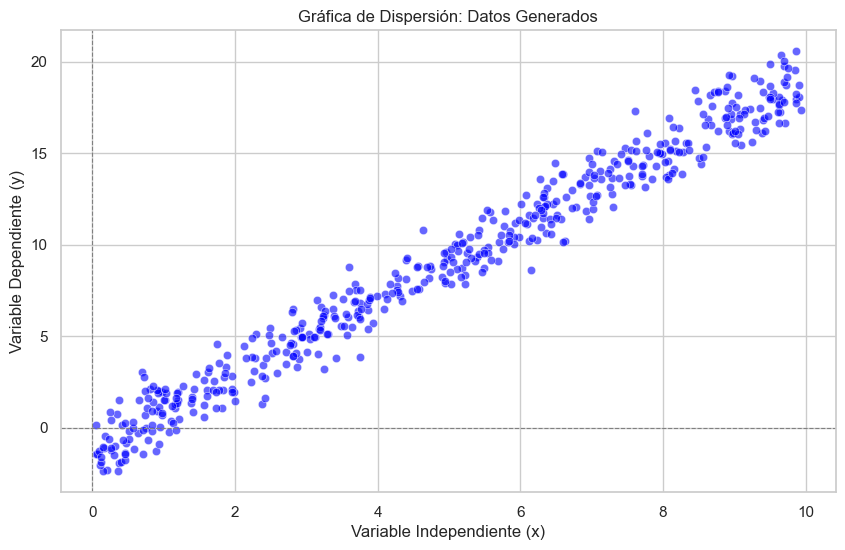

In [57]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generar datos de ejemplo
rng = np.random.RandomState(42)  # Semilla para reproducibilidad
n_size = 500  # Número de muestras
x = 10 * rng.rand(n_size)  # Generar valores aleatorios para x
y = 2 * x - 1 + rng.randn(n_size)  # Generar y con una relación lineal y ruido

# Crear un DataFrame con los datos generados
df = pd.DataFrame({'x': x, 'y': y})

# Graficar los datos
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.scatterplot(data=df, x="x", y="y", color='blue', alpha=0.6)  # Graficar los puntos
plt.title('Gráfica de Dispersión: Datos Generados')  # Título de la gráfica
plt.xlabel('Variable Independiente (x)')  # Etiqueta del eje x
plt.ylabel('Variable Dependiente (y)')  # Etiqueta del eje y
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Línea vertical en x=0
plt.show()  # Mostrar la gráfica

**Definición de la Matriz de Características y el Arreglo de Etiquetas**

En esta sección, definiremos una matriz de características bidimensional y un vector unidimensional de etiquetas (objetivos).

In [58]:
# definir X e y
X = df[['x']] # como dataframe
y = df['y'] # como series

**División de los Datos en Conjuntos de Entrenamiento y Prueba**

Para evaluar el rendimiento del modelo, es crucial dividir los datos en conjuntos de entrenamiento y prueba. Utilizamos la función `train_test_split`  de Scikit-Learn para realizar esta tarea, especificando un 20% de los datos para el conjunto de prueba. Esto nos permite entrenar el modelo con el conjunto de entrenamiento y validarlo posteriormente con el conjunto de prueba.



In [59]:
# Importar la función necesaria para dividir los datos
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada conjunto
print("Tamaño del conjunto de entrenamiento (x_train):", x_train.shape)
print("Tamaño del arreglo de etiquetas de entrenamiento (y_train):", y_train.shape)
print("Tamaño del conjunto de prueba (x_test):", x_test.shape)
print("Tamaño del arreglo de etiquetas de prueba (y_test):", y_test.shape)


Tamaño del conjunto de entrenamiento (x_train): (400, 1)
Tamaño del arreglo de etiquetas de entrenamiento (y_train): (400,)
Tamaño del conjunto de prueba (x_test): (100, 1)
Tamaño del arreglo de etiquetas de prueba (y_test): (100,)


**Selección de una Clase de Modelo**

En Scikit-Learn, cada tipo de modelo se representa mediante una clase de Python. Por ejemplo, si deseamos crear un modelo de regresión lineal simple, podemos importar la clase correspondiente para la regresión lineal. Esto nos permite utilizar todas las funcionalidades y métodos asociados a dicho modelo de manera intuitiva.

In [60]:
from sklearn.linear_model import LinearRegression

**Selección de Hiperparámetros del Modelo**

Es fundamental diferenciar entre una **clase de modelo** y su **instancia**. Al trabajar con un modelo, es necesario considerar preguntas clave sobre su configuración, como:

- ¿Ajustamos el **offset** (intersección en `y`)?
- ¿Necesitamos que el modelo esté **normalizado**?
- ¿Qué grado de **regularización** deseamos?
  
Estas decisiones se reflejan en los **hiperparámetros**, que se establecen al instanciar el modelo en **Scikit-Learn**. Por ejemplo, al crear un modelo de regresión lineal con `LinearRegression`, podemos ajustar el offset usando el hiperparámetro `fit_intercept`.

In [61]:
# Entrenar el modelo con los datos de entrenamiento
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Es importante destacar que al crear una instancia del modelo, la única acción realizada es almacenar los valores de los hiperparámetros. En este punto, **aún no hemos aplicado el modelo a ningún dato**. La API de Scikit-Learn hace una clara distinción entre la **selección del modelo** y **su aplicación a los datos**.

**Ajuste del Modelo a los Datos**

Ahora es el momento de aplicar nuestro modelo a los datos. Esto se realiza utilizando el método `fit()` del modelo:

In [62]:
# Aplicar modelo a los datos
model.fit(x_train, y_train)

LinearRegression()

El método `fit()` realiza una serie de cálculos internos específicos del modelo, y los resultados se almacenan en atributos del modelo que el usuario puede explorar.

 En Scikit-Learn, por convención, todos los parámetros aprendidos durante el proceso `fit()` terminan con guiones bajos. Por ejemplo, en el caso de un modelo lineal, encontramos lo siguiente:

In [63]:
# Imprimir coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)

# Imprimir intercepto del modelo
print("Intercepto del modelo:", model.intercept_)

Coeficientes del modelo: [2.02327729]
Intercepto del modelo: -1.1227537053702488



Los resultados que has obtenido indican lo siguiente:

- **Coeficientes del modelo: [2.02327729]**: Este valor representa la pendiente de la línea de regresión. En este caso, un coeficiente de aproximadamente **2.02** sugiere que, por cada unidad de incremento en la variable independiente $ x $, se espera que la variable dependiente $ y $ aumente en aproximadamente **2.02** unidades.

- **Intercepto del modelo: -1.1227537053702488**: Este valor representa el punto donde la línea de regresión cruza el eje $ y $. Un intercepto de aproximadamente **-1.12** significa que cuando $ x $ es **0**, el valor predicho de $ y $ es aproximadamente **-1.12**. 

En resumen, la ecuación de la regresión lineal que modela tus datos sería:

$$
y = 2.02x - 1.12
$$

Esto implica que existe una relación lineal positiva entre $ x $ e $ y $ y que la línea de regresión se sitúa por debajo del eje $ y $ cuando $ x = 0 $.

**Predicción de Datos Desconocidos**

Una vez que el modelo ha sido entrenado, la principal tarea del aprendizaje automático supervisado es **evaluarlo** con nuevos datos que no formaron parte del conjunto de entrenamiento. En Scikit-Learn, esto se logra utilizando el método `predict()`. Para ilustrar este proceso, generaremos una cuadrícula de valores de \( x \) y utilizaremos el modelo para predecir los correspondientes valores de \( y \).

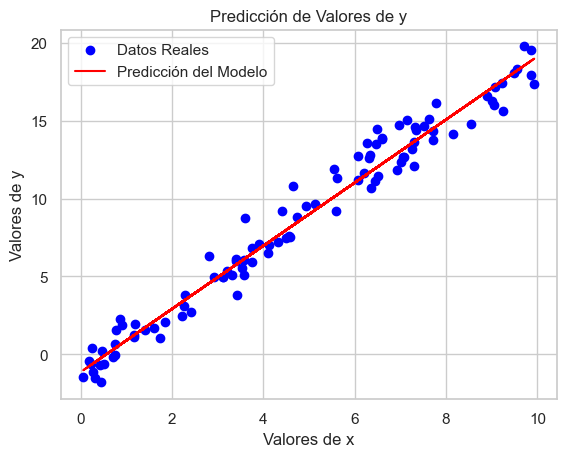

In [64]:
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = x_test.copy()

# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)

# Visualizar los resultados
plt.scatter(x_test, y_test, label='Datos Reales', color='blue')  # Puntos de datos reales
plt.plot(xfit, yfit, label='Predicción del Modelo', color='red')  # Línea de predicción
plt.xlabel('Valores de x')  # Etiqueta del eje x
plt.ylabel('Valores de y')  # Etiqueta del eje y
plt.title('Predicción de Valores de y')  # Título de la gráfica
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la gráfica

El código copia `x_test` a `xfit`, predice los valores de \( y \) usando `xfit`, y luego grafica tanto los datos reales como las predicciones, añadiendo etiquetas y un título a la gráfica. En resumen, predice y visualiza los valores de \( y \) para los datos de prueba.

Explicación del código:

1. **Importar Bibliotecas**: Se cargan las herramientas necesarias.
2. **Cargar Datos**: Se carga el conjunto de datos **Iris**.
3. **Preparar y Dividir Datos**: Se separan características y etiquetas, y se dividen en conjuntos de entrenamiento y prueba.
4. **Entrenar Modelo**: Se crea y entrena un modelo de regresión logística.
5. **Hacer Predicciones**: Se predicen las etiquetas del conjunto de prueba.
6. **Evaluar Modelo**: Se calculan métricas como precisión, F1 Score, y se muestra la matriz de confusión.


**Métricas de Evaluación**

Al evaluar el rendimiento de un modelo de regresión, es fundamental utilizar métricas que cuantifiquen la precisión de las predicciones.

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular MAE, RMSE y MAPE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)  # RMSE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

# Mostrar resultados
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 0.81
RMSE: 1.04
MAPE: 34.64%


Explicación de los resultados:

- **MAE: 0.81**: El error promedio absoluto de las predicciones es 0.81 unidades.
- **RMSE: 1.04**: La raíz del error cuadrático medio es 1.04, indicando que los errores más grandes tienen un impacto significativo.
- **MAPE: 34.64%**: El error promedio porcentual absoluto es 34.64%, lo que sugiere que las predicciones son inexactas en un 34.64% en promedio.


### Aprendizaje Supervisado: Clasificación Iris

En este ejemplo, utilizaremos el conjunto de datos **Iris**. La pregunta que abordaremos es: dado un modelo entrenado con una parte del conjunto de datos Iris, ¿qué tan bien podemos predecir las etiquetas de los datos restantes?

In [66]:
# Importar las bibliotecas necesarias
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Cargar el conjunto de datos Iris
iris = sns.load_dataset('iris')

# Mostrar las primeras filas del conjunto de datos
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
# Preparar los datos para la regresión logística
X = iris.drop('species', axis=1)  # Características
y = iris['species']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar varias métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print()
print('Matriz de confusión:')
print(conf_matrix)

Accuracy: 1.00
F1 Score: 1.00
Precisión: 1.00
Recall: 1.00

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Explicación del código:

1. **Importar Bibliotecas**: Se cargan las herramientas necesarias.
2. **Cargar Datos**: Se carga el conjunto de datos **Iris**.
3. **Preparar y Dividir Datos**: Se separan características y etiquetas, y se dividen en conjuntos de entrenamiento y prueba.
4. **Entrenar Modelo**: Se crea y entrena un modelo de regresión logística.
5. **Hacer Predicciones**: Se predicen las etiquetas del conjunto de prueba.
6. **Evaluar Modelo**: Se calculan métricas como precisión, F1 Score, y se muestra la matriz de confusión.


**Resultados del Modelo**

- **Precisión, F1 Score, Precisión y Recall**: 1.00 (perfecto).
- **Matriz de Confusión**:  Todas las muestras clasificadas correctamente.

El modelo logró un rendimiento *perfecto* en el conjunto de datos **Iris**.

### Aprendizaje No Supervisado: Reducción de Dimensionalidad en Iris

En este ejemplo, reduciremos la dimensionalidad del conjunto de datos Iris, que tiene cuatro características por muestra. La reducción de dimensionalidad facilita la visualización de datos, ya que **es más sencillo graficar en dos dimensiones**.

Usaremos el **análisis de componentes principales (PCA)** para obtener dos componentes que representen los datos en dos dimensiones. 

A continuación, se presentan los pasos a seguir:



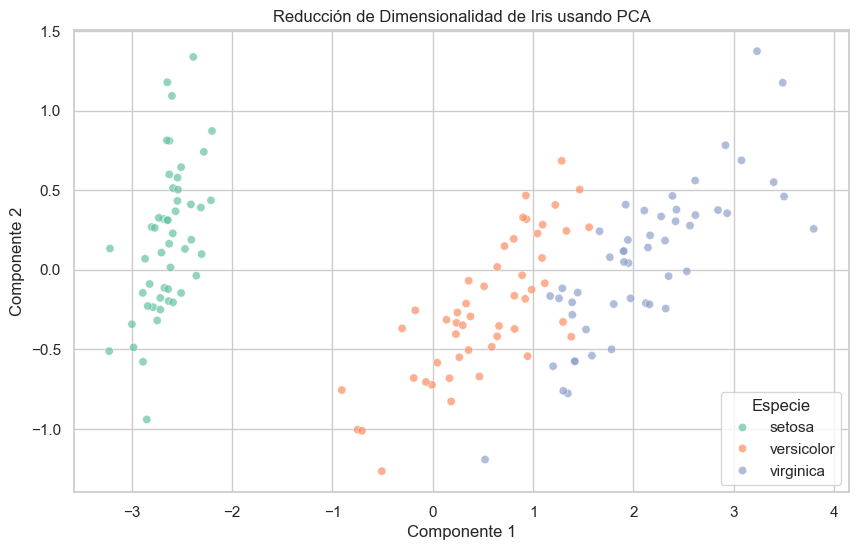

In [68]:
# Importar las bibliotecas necesarias
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
iris = sns.load_dataset('iris')

# Separar las características (X) y las etiquetas (y)
X_iris = iris.drop('species', axis=1)  # Características
y_iris = iris['species']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba (opcional, solo para referencia)
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# 1. Elegir la clase de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar el modelo con hiperparámetros
model = PCA(n_components=2)    

# 3. Ajustar el modelo a los datos
model.fit(X_iris)

# 4. Transformar los datos
X_pca = model.transform(X_iris)

# 5. Crear un DataFrame con los resultados
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Especie'] = y_iris.values  # Agregar la especie al DataFrame

# 6. Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='Componente 1', y='Componente 2', hue='Especie', palette='Set2', alpha=0.7)
plt.title('Reducción de Dimensionalidad de Iris usando PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Especie')
plt.grid(True)
plt.show()

**Explicación del Código**

1. **Carga de Bibliotecas**: Se importan las bibliotecas necesarias para el análisis y visualización.
2. **Carga del Conjunto de Datos**: Se carga el conjunto de datos Iris y se separan las características de las etiquetas.
3. **División de Datos**: (Opcional) Se dividen los datos en conjuntos de entrenamiento y prueba, sin uso en PCA.
4. **Instanciación del Modelo PCA**: Se crea un modelo PCA para reducir a dos componentes.
5. **Ajuste y Transformación**: Se ajusta el modelo a los datos y se obtienen las dos dimensiones.
6. **Creación de un DataFrame**: Se genera un DataFrame con las componentes y las especies.
7. **Visualización**: Se grafican las componentes en un gráfico de dispersión, diferenciando por especie.


En la representación bidimensional, las especies se encuentran bien separadas, **¡a pesar de que el algoritmo PCA no utilizó las etiquetas de las especies!** 

Esto sugiere que es probable que una clasificación simple sea efectiva en este conjunto de datos, como se observó anteriormente.

### Aprendizaje No Supervisado: Agrupamiento de Iris

A continuación, exploraremos cómo aplicar el agrupamiento a los datos de Iris. Un algoritmo de agrupamiento busca identificar diferentes grupos en los datos sin hacer referencia a etiquetas predefinidas. En este caso, utilizaremos un método eficaz de agrupamiento conocido como **KMeans**.

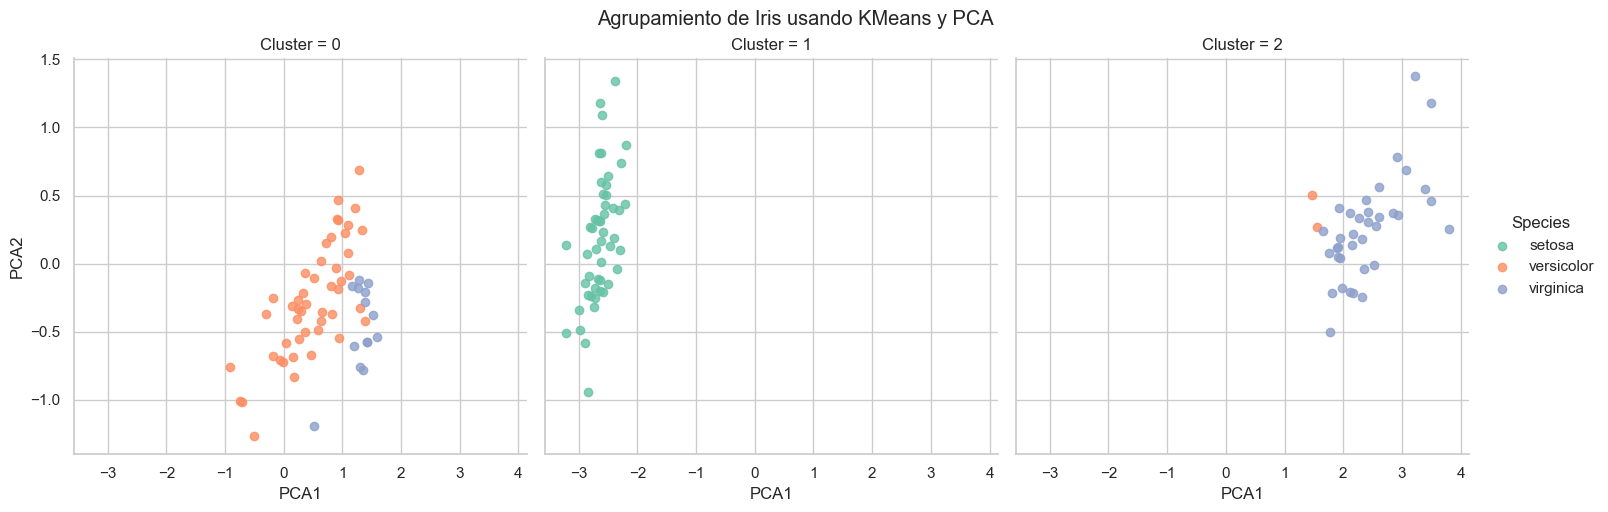

In [70]:
# Importar las bibliotecas necesarias
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar el conjunto de datos Iris
iris = sns.load_dataset('iris')

# Separar las características (X)
X_iris = iris.drop('species', axis=1)  # Características

# 1. Elegir la clase de modelo
# 2. Instanciar el modelo con hiperparámetros
model = KMeans(n_clusters=3, n_init=100, random_state=42)

# 3. Ajustar el modelo a los datos
model.fit(X_iris)

# 4. Predecir los grupos
clusters = model.predict(X_iris)

# 5. Añadir los grupos al DataFrame
iris['Cluster'] = clusters

# 6. Reducir dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

# 7. Crear un DataFrame con las componentes PCA y los clústeres
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters
df_pca['Species'] = iris['species']  # Agregar la especie al DataFrame

# 8. Visualizar los resultados con sns.lmplot
sns.lmplot(x='PCA1', y='PCA2', data=df_pca,
           hue='Species', col='Cluster', fit_reg=False, palette='Set2')

plt.suptitle('Agrupamiento de Iris usando KMeans y PCA', y=1.02)
plt.show()

**Explicación del Código**

1. **Carga de Bibliotecas**: Se importan las bibliotecas necesarias para análisis, agrupamiento y visualización.
2. **Carga del Conjunto de Datos**: Se carga el conjunto de datos Iris y se separan las características.
3. **Instanciación del Modelo KMeans**: Se crea una instancia de KMeans especificando el número de clústeres.
4. **Ajuste del Modelo**: Se ajusta el modelo a los datos sin etiquetas.
5. **Predicción de Grupos**: Se predicen los grupos para cada muestra en el conjunto de datos.
6. **Añadir Grupos al DataFrame**: Se añaden los resultados del agrupamiento al DataFrame.
7. **Reducción de Dimensionalidad**: Se utiliza PCA para reducir a dos dimensiones.
8. **Visualización con `sns.lmplot`**: Se visualizan los resultados, mostrando las componentes PCA y coloreando por especie y clúster.

Al dividir los datos por grupo, podemos observar con claridad cuán efectivamente el algoritmo **KMeans** ha recuperado las etiquetas subyacentes.

Esto indica que, incluso sin la intervención de un experto para identificar las especies de las flores, las características de las flores son lo suficientemente distintas como para que un algoritmo de agrupamiento simple pueda identificar automáticamente la presencia de diferentes grupos de especies.


## Referencias


* **Scikit-learn Documentation**: [Scikit-learn](https://scikit-learn.org/stable/documentation.html)  
* **Introduction to Statistical Learning**: [ISLR](https://www.statlearning.com/)  
